<a href="https://colab.research.google.com/github/bforoura/GENAI26/blob/main/Module1/Image_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Generation with a Diffuser Model**

* We need to install the following libraries:

   1. **diffusers**: This is the core library that contains the Stable **Diffusion Pipeline**.

   2. **transformers**: This provides the **CLIP model**, which acts as the translator between the text prompt and the image generator.

   3. **accelerate**: This helps handle the heavy mathematical lifting on the GPU.
   
   4. Make sure to ask for a GPU to run this norebook:

   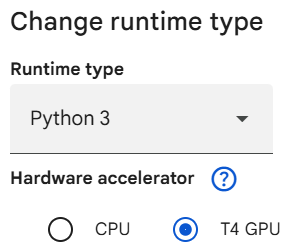



In [ ]:
# the needed libraries
!pip install diffusers transformers accelerate



In [ ]:
from tqdm import tqdm
from functools import partial

# Force tqdm to use the standard text version instead of the widget version
tqdm = partial(tqdm, dynamic_ncols=True, disable=False)

# **The Running Environment**

1. We first go to the **Hugging Face Model Hub** and download all the AI models such as the VAE, the **CLIP** tokenizer, etc.

2. **CLIP** stands for **Contrastive Language-Image Pre-training**
   * A model developed by OpenAI that acts as a bridge between **words** and **pictures**.
   
   * **CLIP** was trained by looking at 400 million pairs of images and their captions from the internet to learn how they relate.

   * E.g. If you show it a **photo of a dog** and **the text "a photo of a dog,"** it learns to push those together in its **latent space**.

2. We then move the 4GB+ of model weights from the computer's general memory into the Graphics Card's memory.

3. A CPU might take 5 minutes to make one image but aa CUDA-enabled GPU (NVIDIA) can do it in 2 seconds.

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Load the model into memory
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    dtype=torch.float16
).to("cuda")


# **The Sculptor**

* **Stable Diffusion** creates images by starting with some noise and slowly cleaning it up.

* The **seed** is the number that determines exactly what that static looks like before the AI starts its work. So, if you use Seed 42, the formula always spits out the exact same pattern of noise.


* **num_inference_steps** is the most important parameter here

* It tells the AI how many times to **chip away** at the noise.

    * **1-10 Steps**: You'll see blurry blobs

    * **20-50 Steps**: You'll see sharper details and textures

* **Note**:

  * **CLIP**, the **translator**, uses **Visual Tokens** (14x14 patches).
  * It needs them to **read** an image so it can match it to a caption.
  * **Stable Diffusion**, the **sculptor**, uses a **Latent Space**.


In [ ]:
# Create a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(60)

image = pipe(
    prompt = "a cat in spacesuit",
    generator=generator,
    num_inference_steps=50
).images[0]

image